In [1]:
from matplotlib import pyplot as plt
import numpy as np

Definition of constants

- `Nl` The total number of odorants

- `Nr` The number of receptors

- `K` The average number of odorants in the mixture

- `s` The probability that an odorant binds to a receptor


In [2]:
class BinaryEliminationSystem:

    ss_mat = None # Sparse Sensing Matrix
    ss_mat_index = None
    nl:int = 0 # total number of odorants
    nr:int = 0 # number of receptors
    k:int = 0 # average number of odorants in mixture
    s:float = 0 # probability that an odorant binds to a receptor
    odor_mat = None # generated odor inputs matrix (column major)
    rr = None; # receptor response matrix (column major)
    pred_odor_mat = None # predicted odor inputs (column major)


    def __init__(self, nl, nr, k, s):
        self.nl = nl
        self.nr = nr
        self.k = k
        self.s = s
        self.generate_ss_mat()


    def generate_ss_mat(self):
        """
        Generate a new sparce sensing matrix
        Args: 
        
        Returns:
            out (None): None
        """
        self.ss_mat = np.zeros((self.nr, self.nl), dtype=np.uint8)
        self.ss_mat_index = [[] for i in range(self.nr)]
        value = np.random.random((self.nr, self.nl)) < self.s
        for i in range(self.nr):
            for j in range(self.nl):
                if value[i, j]:
                    self.ss_mat[i, j] = 1;
                    self.ss_mat_index[i].append(j)
    

    def __generate_rand_odor(self, count):
        """
        Generate some odor vectors. Dimension of self.odor_mat will be (nl by count)
        Args: 
            count: Number of odor vectors to generate
        Returns:
            out (None): none
        """
        self.odor_mat = np.zeros((self.nl, count))
        for j in range(count):
            chosen = np.random.choice(self.nl, size=self.k, replace=False)
            for i in range(chosen.size):
                self.odor_mat[chosen[i], j] = 1
        
    
    def __get_rr(self):
        """
        Calculate the receptor response
        Args: 
            
        Returns:
            out (None): none
        """
        self.rr = np.dot(self.ss_mat, self.odor_mat)


    def encode_decode(self, count):
        """
        Calculate the receptor response
        Args: 
            
        Returns:
            out (None): none
        """
        self.__generate_rand_odor(count)
        self.__get_rr()
        self.pred_odor_mat = np.ones((self.nl, count), dtype=np.uint8)
        inactive = np.where(self.rr == 0)
        inactive = np.array(inactive)
        for i in range(count):
            inact = np.where(inactive[1,:] == i)
            zero_out = np.any(self.ss_mat[inactive[0,inact]][0] == 1, axis=0)
            self.pred_odor_mat[zero_out, i] = 0


    def show_result(self):
        count = 0
        for i in range(self.odor_mat.shape[1]):
            if (np.array_equal(self.odor_mat.T[i, :], self.pred_odor_mat.T[i, :])):
                count += 1
        return count

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


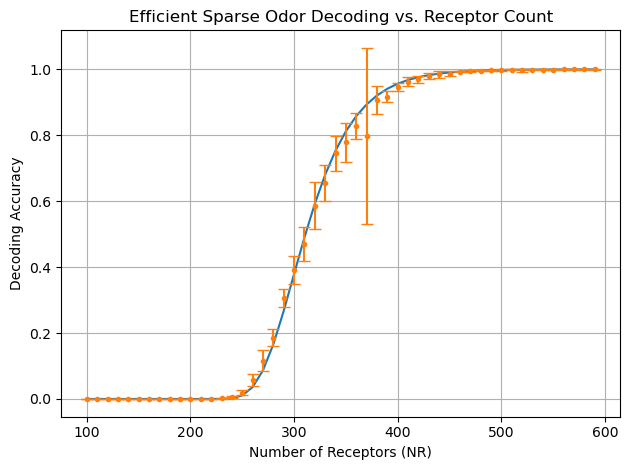

In [5]:
probs = []
mean_probs = []
errs = []
nr_values = np.arange(100, 600, 10)
for nr in nr_values:
    print(nr)
    trial_accuracies = np.zeros(10)
    a = BinaryEliminationSystem(10000, nr, 10, 0.05)
    for i in range(10):
        a.generate_ss_mat()
        a.encode_decode(500)
        correct = a.show_result()
        trial_accuracies[i] = correct / 500
    mean_probs.append(np.mean(trial_accuracies))
    errs.append(np.std(trial_accuracies))

# Plot
def estpc(Nr,k,s, NL):
    alpha = k/NL
    return (alpha+(1-alpha)*(1-(1-s*(1-s*alpha)**(NL-1))**Nr))**NL

plt.plot(nr_values,estpc(nr_values,10,0.05, 10000))
plt.errorbar(nr_values, mean_probs, yerr=errs, fmt='o', markersize=3, capsize=4)
plt.xlabel("Number of Receptors (NR)")
plt.ylabel("Decoding Accuracy")
plt.title("Efficient Sparse Odor Decoding vs. Receptor Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
def phalf(s):
    return -(-4.61486830584+np.log(1/s))/s

NR = 1000
NL = 100000
k_vals = np.arange(1,50,1)
s_vals = np.linspace(0.01,0.1,49)
probs=np.zeros((49,49))
sNRs = []
ESTs = []

for i in range(len(s_vals)):
    sNRs.append(s_vals[i]*NR)
    ESTs.append(phalf(s_vals[i]))
    print(f"Working on {i+1}/{len(s_vals)}")
    for j in range(len(k_vals)):
        print(f"\tWorking on {j+1}/{len(k_vals)}")
        a = BinaryEliminationSystem(NL, NR, k_vals[j], s_vals[i])
        a.encode_decode(10)
        correct = a.show_result()
        probs[j][i] = correct / 10
        
plt.plot(sNRs, ESTs,color='w')
plt.contourf(sNRs, k_vals, probs, levels=50, cmap='viridis')
plt.colorbar(label='P(c=c)')
plt.xlabel('s*NR')
plt.ylabel('K')
plt.savefig("binary2")
plt.show()

Working on 1/49
	Working on 1/49
	Working on 2/49
	Working on 3/49
	Working on 4/49
	Working on 5/49
	Working on 6/49
	Working on 7/49
	Working on 8/49
	Working on 9/49
	Working on 10/49
	Working on 11/49
	Working on 12/49
	Working on 13/49
	Working on 14/49
	Working on 15/49
	Working on 16/49
	Working on 17/49
	Working on 18/49
	Working on 19/49
	Working on 20/49
	Working on 21/49
	Working on 22/49
	Working on 23/49
	Working on 24/49
	Working on 25/49
	Working on 26/49
	Working on 27/49
	Working on 28/49
	Working on 29/49
	Working on 30/49
	Working on 31/49
	Working on 32/49
	Working on 33/49
	Working on 34/49
	Working on 35/49
	Working on 36/49
	Working on 37/49
	Working on 38/49
	Working on 39/49
	Working on 40/49
	Working on 41/49
	Working on 42/49
	Working on 43/49
	Working on 44/49
	Working on 45/49
	Working on 46/49
	Working on 47/49
	Working on 48/49
	Working on 49/49
Working on 2/49
	Working on 1/49
	Working on 2/49
	Working on 3/49
	Working on 4/49
	Working on 5/49
	Working o

KeyboardInterrupt: 

GPU acclerated version

Running on mps
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


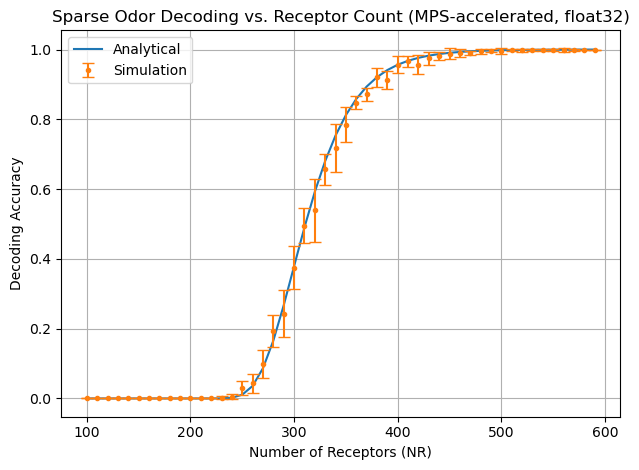

In [9]:
import torch
from matplotlib import pyplot as plt
import numpy as np

# Pick MPS on macOS, else CPU
device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
print("Running on", device)

class BinaryEliminationSystemTorch:
    def __init__(self, nl, nr, k, s, device):
        self.device = device
        self.nl, self.nr, self.k, self.s = nl, nr, k, s
        self._make_ss_mat()

    def _make_ss_mat(self):
        # float32 sensing matrix of 0.0/1.0 on device
        self.ss_mat = (torch.rand(self.nr, self.nl, device=self.device) < self.s).to(torch.float32)

    def _make_odors(self, count):
        # float32 odor matrix (nl×count)
        odors = torch.zeros(self.nl, count, dtype=torch.float32, device=self.device)
        for j in range(count):
            idx = torch.randperm(self.nl, device=self.device)[:self.k]
            odors[idx, j] = 1.0
        return odors

    def encode_decode(self, count):
        odors = self._make_odors(count)                           # (nl×count), float32
        rr = self.ss_mat @ odors                                   # (nr×count), float32 sums
        inactive = (rr == 0.0)                                     # (nr×count) bool

        # build zero_mask: any inactive receptor that binds odorant j in sample i
        # we use ss_mat.bool() to restore the binding pattern
        bind_bool = self.ss_mat.bool().unsqueeze(2)                # (nr×nl×1)
        inactive_u = inactive.unsqueeze(1)                         # (nr×1×count)
        zero_mask = (bind_bool & inactive_u).any(dim=0)            # (nl×count) bool

        pred = torch.ones(self.nl, count, dtype=torch.float32, device=self.device)
        pred[zero_mask] = 0.0
        return odors, pred

    def accuracy(self, odors, pred):
        # compare binary patterns via bool
        od_bool  = odors  > 0.5
        pd_bool  = pred   > 0.5
        matches  = (od_bool == pd_bool).all(dim=0)                 # (count,) bool
        return matches.sum().item() / matches.numel()

# Experiment parameters
nl, k, s = 10000, 10, 0.05
nr_values = np.arange(100, 600, 10)
mean_probs, errs = [], []

for nr in nr_values:
    print(nr)
    torch.mps.empty_cache()
    sys = BinaryEliminationSystemTorch(nl, nr, k, s, device)
    accs = []
    for _ in range(10):
        sys._make_ss_mat()
        odors, pred = sys.encode_decode(count=100)
        accs.append(sys.accuracy(odors, pred))
    mean_probs.append(np.mean(accs))
    errs.append(np.std(accs))

# Analytical estimate
def estpc(Nr, k, s, NL):
    alpha = k / NL
    return (alpha + (1-alpha)*(1-(1 - s*(1 - s*alpha)**(NL-1))**Nr))**NL

# Plot (on CPU)
plt.plot(nr_values, estpc(nr_values, k, s, nl), label='Analytical')
plt.errorbar(nr_values, mean_probs, yerr=errs, fmt='o',
             markersize=3, capsize=4, label='Simulation')
plt.xlabel("Number of Receptors (NR)")
plt.ylabel("Decoding Accuracy")
plt.title("Sparse Odor Decoding vs. Receptor Count (MPS‐accelerated, float32)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Running on mps
Done s-index 1/49
Done s-index 2/49
Done s-index 3/49
Done s-index 4/49
Done s-index 5/49
Done s-index 6/49
Done s-index 7/49
Done s-index 8/49
Done s-index 9/49
Done s-index 10/49
Done s-index 11/49
Done s-index 12/49
Done s-index 13/49
Done s-index 14/49
Done s-index 15/49
Done s-index 16/49
Done s-index 17/49
Done s-index 18/49
Done s-index 19/49
Done s-index 20/49
Done s-index 21/49
Done s-index 22/49
Done s-index 23/49
Done s-index 24/49
Done s-index 25/49
Done s-index 26/49
Done s-index 27/49
Done s-index 28/49
Done s-index 29/49
Done s-index 30/49
Done s-index 31/49
Done s-index 32/49
Done s-index 33/49
Done s-index 34/49
Done s-index 35/49
Done s-index 36/49
Done s-index 37/49
Done s-index 38/49
Done s-index 39/49
Done s-index 40/49
Done s-index 41/49
Done s-index 42/49
Done s-index 43/49
Done s-index 44/49
Done s-index 45/49
Done s-index 46/49
Done s-index 47/49
Done s-index 48/49
Done s-index 49/49


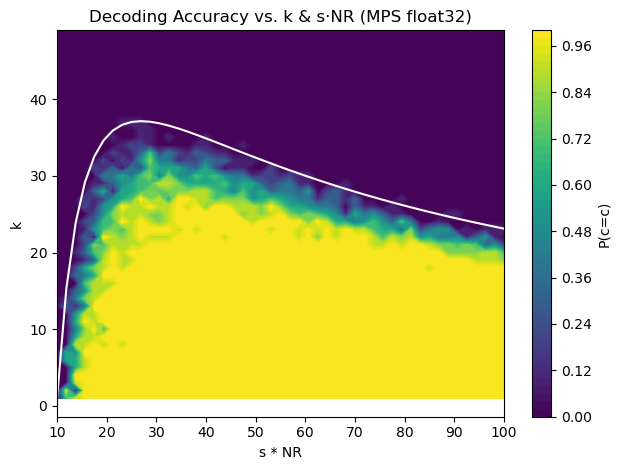

In [10]:
import torch
import numpy as np
from matplotlib import pyplot as plt

# pick MPS on macOS, else CPU
device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
print("Running on", device)

# phalf can stay in NumPy, since it's tiny
def phalf(s):
    return -(-4.61486830584 + np.log(1/s)) / s

# --- reuse our float32 MPS class: ---
class BinaryEliminationSystemTorch:
    def __init__(self, nl, nr, k, s, device):
        self.device = device
        self.nl, self.nr, self.k, self.s = nl, nr, k, s
        self._make_ss_mat()

    def _make_ss_mat(self):
        # float32 0/1 sensing matrix
        self.ss_mat = (torch.rand(self.nr, self.nl, device=self.device) < self.s).to(torch.float32)

    def _make_odors(self, count):
        odors = torch.zeros(self.nl, count, dtype=torch.float32, device=self.device)
        for j in range(count):
            idx = torch.randperm(self.nl, device=self.device)[:self.k]
            odors[idx, j] = 1.0
        return odors

    def encode_decode(self, count):
        odors = self._make_odors(count)           # (nl×count)
        rr    = self.ss_mat @ odors               # (nr×count) sums
        inactive = (rr == 0.0)                    # (nr×count) bool

        bind_bool = self.ss_mat.bool().unsqueeze(2)   # (nr×nl×1)
        inactive_u = inactive.unsqueeze(1)            # (nr×1×count)
        zero_mask  = (bind_bool & inactive_u).any(dim=0)  # (nl×count) bool

        pred = torch.ones(self.nl, count, dtype=torch.float32, device=self.device)
        pred[zero_mask] = 0.0
        return odors, pred

    def accuracy(self, odors, pred):
        od_b = odors  > 0.5
        pd_b = pred   > 0.5
        matches = (od_b == pd_b).all(dim=0)
        return matches.sum().item() / matches.numel()

# --- experiment setup ---
NR      = 1000
NL      = 100000
k_vals  = np.arange(1, 50)
s_vals  = np.linspace(0.01, 0.1, 49)

probs   = np.zeros((len(k_vals), len(s_vals)))
sNRs    = s_vals * NR
ESTs    = phalf(s_vals)

# --- run sims on MPS ---
for i, s in enumerate(s_vals):
    torch.mps.empty_cache()
    for j, k in enumerate(k_vals):
        sys = BinaryEliminationSystemTorch(NL, NR, k, s, device)
        # regen sensing‐matrix each trial?
        # (here we do one trial of 10 odors for speed)
        odors, pred = sys.encode_decode(count=10)
        probs[j, i] = sys.accuracy(odors, pred)
    print(f"Done s-index {i+1}/{len(s_vals)}")

# --- plotting ---
plt.plot(sNRs, ESTs, color='w', label='Estimate phalf')
plt.contourf(sNRs, k_vals, probs, levels=50, cmap='viridis')
plt.colorbar(label='P(c=c)')
plt.xlabel('s * NR')
plt.ylabel('k')
plt.title('Decoding Accuracy vs. k & s·NR (MPS float32)')
plt.tight_layout()
plt.savefig("binary2_mps.png")
plt.show()

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Rewritten to use PyTorch + MPS for acceleration and float16 for memory efficiency.
"""

import torch
import matplotlib.pyplot as plt

# Select MPS if available
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
# Use float16 to halve memory footprint (fallback to float32 if not supported)
dtype = torch.float16 if torch.backends.mps.is_available() else torch.float32

# --- Core functions ---
@torch.no_grad()
def make_weighted_sense_mat(NL, NR, k, s, device=device, dtype=dtype):
    # Odor vector: NL×1, with k nonzero random weights in [0,1)
    odor_vec = torch.zeros((NL, 1), device=device, dtype=dtype)
    idx = torch.randperm(NL, device=device)[:k]
    odor_vec[idx, 0] = torch.rand((k,), device=device, dtype=dtype)

    # Sensitivity mask: NR×NL of booleans
    mask = (torch.rand((NR, NL), device=device, dtype=dtype) < s)
    # Preallocate sense_mat in half precision
    sense_mat = torch.zeros((NR, NL), device=device, dtype=dtype)

    # Sample log‐uniform weights for each True in mask
    mcount = int(mask.sum().item())
    # uniform in [log(0.01), log(1)]
    log_low, log_high = torch.log(torch.tensor(0.01, device=device)), torch.log(torch.tensor(1.0, device=device))
    rand_logs = torch.rand((mcount,), device=device, dtype=dtype) * (log_high - log_low) + log_low
    sense_mat[mask] = torch.exp(rand_logs)

    # Receptor responses: (NR×NL) @ (NL×1) → (NR×1)
    recep_vec = sense_mat.matmul(odor_vec)

    return sense_mat, odor_vec, recep_vec

@torch.no_grad()
def weighted_decode(NL, NR, k, s, device=device, dtype=dtype):
    sense_mat, odor_vec, recep_vec = make_weighted_sense_mat(NL, NR, k, s, device, dtype)

    # Start with all ones, then we'll solve for active columns only
    odor_guess = torch.ones((NL, 1), device=device, dtype=dtype)

    # Find receptors that gave zero response
    inactive = (recep_vec.abs() < 1e-6).view(-1)
    if inactive.any():
        # zero_out columns where any inactive receptor had sensitivity > 0
        zero_cols = sense_mat[inactive].any(dim=0)
        active_cols = ~zero_cols
        active_rows = ~inactive

        A = sense_mat[active_rows][:, active_cols]  # smaller matrix
        b = recep_vec[active_rows]                 # corresponding responses

        # Solve least‐squares: x = pinv(A) @ b
        # pinv on GPU in half precision:
        x = torch.linalg.pinv(A.to(dtype=torch.float32)).to(dtype) @ b
        # Fill into guess
        odor_guess[:] = 0
        odor_guess[active_cols, 0] = x.squeeze()

    return odor_guess, sense_mat, odor_vec, recep_vec

# --- Simulation 1: decoding accuracy vs. NR ---
NL = 10_000
k = 10
s = 0.05
NR_values = torch.arange(100, 600, 10, device=device)

mean_probs = []
errs = []

for NR in NR_values:
    trial_acc = torch.zeros(10, device=device, dtype=dtype)
    print(NR)
    for t in range(10):
        correct = 0
        for _ in range(100):
            guess, _, actual, _ = weighted_decode(NL, int(NR.item()), k, s)
            # compare with a tolerance
            correct += int(torch.allclose(guess, actual, atol=1e-2, rtol=1e-2))
        trial_acc[t] = correct / 100.0
    mean_probs.append(trial_acc.mean().item())
    errs.append(trial_acc.std().item())

# Move to CPU for plotting
NR_cpu = NR_values.cpu().numpy()
mean_cpu = torch.tensor(mean_probs).cpu().numpy()
err_cpu = torch.tensor(errs).cpu().numpy()

plt.figure()
plt.errorbar(NR_cpu, mean_cpu, yerr=err_cpu, fmt='o', capsize=4)
plt.xlabel("Number of Receptors (NR)")
plt.ylabel("Decoding Accuracy")
plt.title("Efficient Sparse Odor Decoding vs. Receptor Count (MPS float16)")
plt.grid(True)
plt.tight_layout()
plt.savefig("weighted1_mps.png")
plt.show()

tensor(100, device='mps:0')
tensor(110, device='mps:0')
tensor(120, device='mps:0')
tensor(130, device='mps:0')
tensor(140, device='mps:0')
tensor(150, device='mps:0')
tensor(160, device='mps:0')
tensor(170, device='mps:0')
tensor(180, device='mps:0')
tensor(190, device='mps:0')
tensor(200, device='mps:0')


KeyboardInterrupt: 

In [ ]:
# --- Simulation 2: contour over k & s*NR ---
NR = 1000
k_vals = torch.arange(1, 50, device=device)
s_vals = torch.linspace(0.01, 0.1, 49, device=device)
probs = torch.zeros((len(k_vals), len(s_vals)), device=device, dtype=dtype)

for i, S in enumerate(s_vals):
    for j, K in enumerate(k_vals):
        correct = 0
        for _ in range(10):
            guess, _, actual, _ = weighted_decode(100_000, int(NR), int(K.item()), float(S.item()))
            correct += int(torch.allclose(guess, actual, atol=1e-2, rtol=1e-2))
        probs[j, i] = correct / 10.0

# Prepare CPU grids
sNRs = (s_vals * NR).cpu().numpy()
K_cpu = k_vals.cpu().numpy()
Z = probs.cpu().numpy()

plt.figure()
X, Y = np.meshgrid(sNRs, K_cpu)
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='P(c=c)')
plt.xlabel('s * NR')
plt.ylabel('K')
plt.title("Decoding Success Probability (MPS float16)")
plt.savefig("weighted2_mps.png")
plt.show()